# IDEAS:

**DONE**
* cross-validation evaluation (evaluate on changing subsets of the known (x, y)) **DONE**
* stimulate simpleness (prefer shorter chromosomes when sorting) **DONE**
* when domain error, replace the subtree giving the number by randdom constant **DONE**
* display diversity measure **DONE**
* restrict mutation probability (a lot) **BAD**
* implement one node replacement (keeping the subtree under it) **SOMEWHAT**

**TBD**

* implement objective that will benefit functions with correct operations with possibly bad scaling (probably unrealistic)
* island populations (may be too complicated)
---
* implement optimized constant symbols
* implement **A**utomatically **D**efined **F**unctions
* implement max depth into mutation (new subtree depth + dept of the target node <= max depth)

In [4]:
using EO
using Plots
using CSV, DataFrames

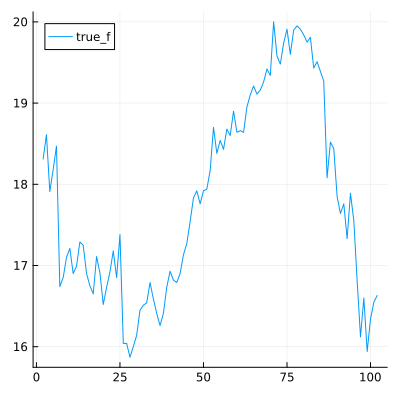

In [5]:
#= function square(x)
    return x^2
end
function cube(x)
    return x^3
end
logaritmus(x) = log(abs(x)) =#
basis_functions = [+, -, *, /, sin, cos, EO.square, EO.cube, EO.logaritmus]
basis_variables = Vector{Any}([#= 2., 1., 0.,  =#:var1#= , :var2 =#])
# symbols are expected to be supplied as arguments to the trained model (in alphabetical order of the symbols)
# model = EO.Expr_parser(solution.top_coords);
# ŷ = model(var1);

#true_f = x -> x*cos(20*x) + x + 10*sin(x)
#true_f = x -> x*cos(x) + x + sin(x)
#true_f = x -> x^5 - 2*x^3 + x
#true_f = x -> 20*sin(x)
#true_f = (x, x2) -> x + x2 + 123
#true_f = (x, x2) -> x*cos(x2)

#x = collect(LinRange(-1., 100., 100))
#y = true_f.(x);

#f(a, b) = a*cos(b)

x = collect(2:1:102)
data = CSV.read("../trading_data/archive(4)/sp500_stocks.csv", DataFrame)
price = filter("Symbol" => x->x == "EA", data).Open
y = float.(price[x])
x = float.(x)

plot(x, y, label="true_f", size=(400, 400))
#plot(x, x2, f, label="true_f", size=(400, 400), st=:surface)

In [8]:
pop_size = 300

#objective_function  = enclose_arguments(EO.f_function_diff_subset, x, y, 0.9)
objective_function  = enclose_arguments(EO.f_function_diff_squared, y, x)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 100, 3)
#selection           = enclose_arguments(EO.s_greedy_overselection, pop_size, 0.16)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
#crossover           = enclose_arguments(EO.cr_GSGP, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(EO.r_best_n_diverse, pop_size, 0.7)       # chosen fraction of the population will consist of the best n, the rest is random
termination         = enclose_argument(iteration_termination, pop_size*20)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

model = EO.Expr_parser(solution.top_coords);
println(model.(x))
println(y)
println(solution.top_coords)

[19.5250524204487, 17.549567616509975, 18.005932233100342, 17.756767080093283, 17.032379644052302, 16.614521426050743, 16.75655888063053, 17.089096079826163, 17.352614100228603, 17.491583628901193, 17.546911833543152, 17.56907003700695, 17.586124460591027, 17.60417915097701, 17.61676774636663, 17.614203140765937, 17.58899960642849, 17.539879070572812, 17.46706730010224, 17.380568652652745, 17.283862045791047, 17.187862804754104, 17.09856813062194, 17.022436528945306, 16.964920537456013, 16.928040862068617, 16.912278990714828, 16.918247851786855, 16.94387199351061, 16.98704739874907, 17.0453635505617, 17.11535058513835, 17.194511578649568, 17.28034715048037, 17.36863600549286, 17.458776149400425, 17.547858743374515, 17.63455835299133, 17.717581068489586, 17.795942176837638, 17.868987103353, 17.936350364774967, 17.997878928589664, 18.05361202744105, 18.10373932867777, 18.148565588256186, 18.1886136990188, 18.223920837056752, 18.255367536151017, 18.283294664520508, 18.30818540917288, 18.3

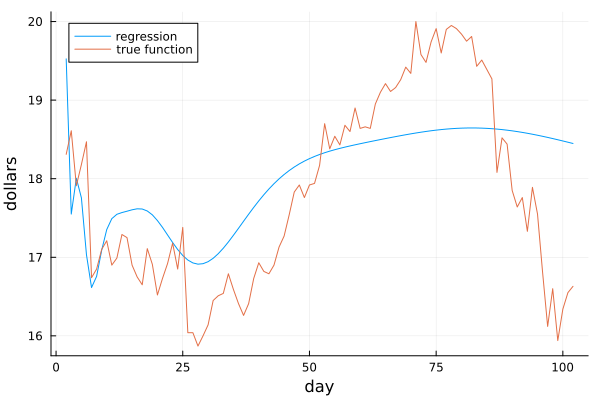

In [10]:
#= fs(x, y) = model(x, y)
p = plot(x, x2, fs, label="regressed_f", size=(400, 400), st=:surface)
p = plot!(p, x, x2, f, label="true_f", st=:surface) =#
p = plot(x, model.(x), label="regression")
p = plot!(p, x, y, label="true function", xlabel="day", ylabel="dollars")
savefig(p, "../images/GP_regression.svg")
p

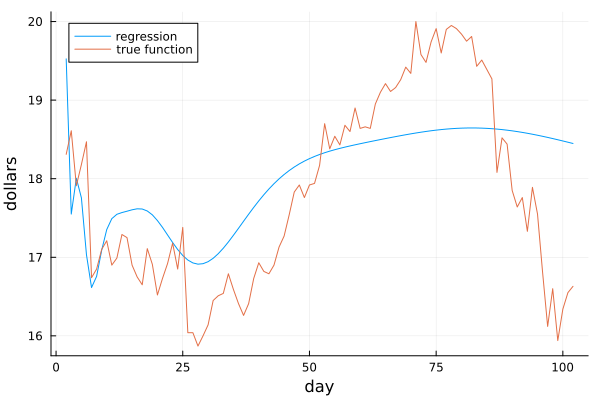

In [19]:
xt = float.(collect(2:1:202))

p = plot(x, model.(x), label="regression")
p = plot!(p, x, y, label="true function", xlabel="day", ylabel="dollars")
savefig(p, "../images/GP_prediction.svg")
p

In [5]:
fs(x, y) = EO.Expr_parser(solution.coords_history[1])(x, y)
p = plot(x, x2, fs, label="regressed_f", size=(400, 400), st=:surface)
#p = plot!(p, x, x2, f, label="true_f", st=:surface)


UndefVarError: UndefVarError: `x2` not defined

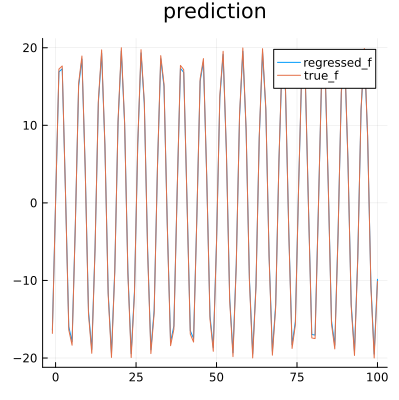

In [6]:
xx = collect(LinRange(-1., 100., 100))
yy = true_f.(xx);
p = plot(xx, EO.Expr_parser(solution.top_coords).(xx), label="regressed_f", size=(400, 400), title="prediction")
p = plot!(p, xx, yy, label="true_f")

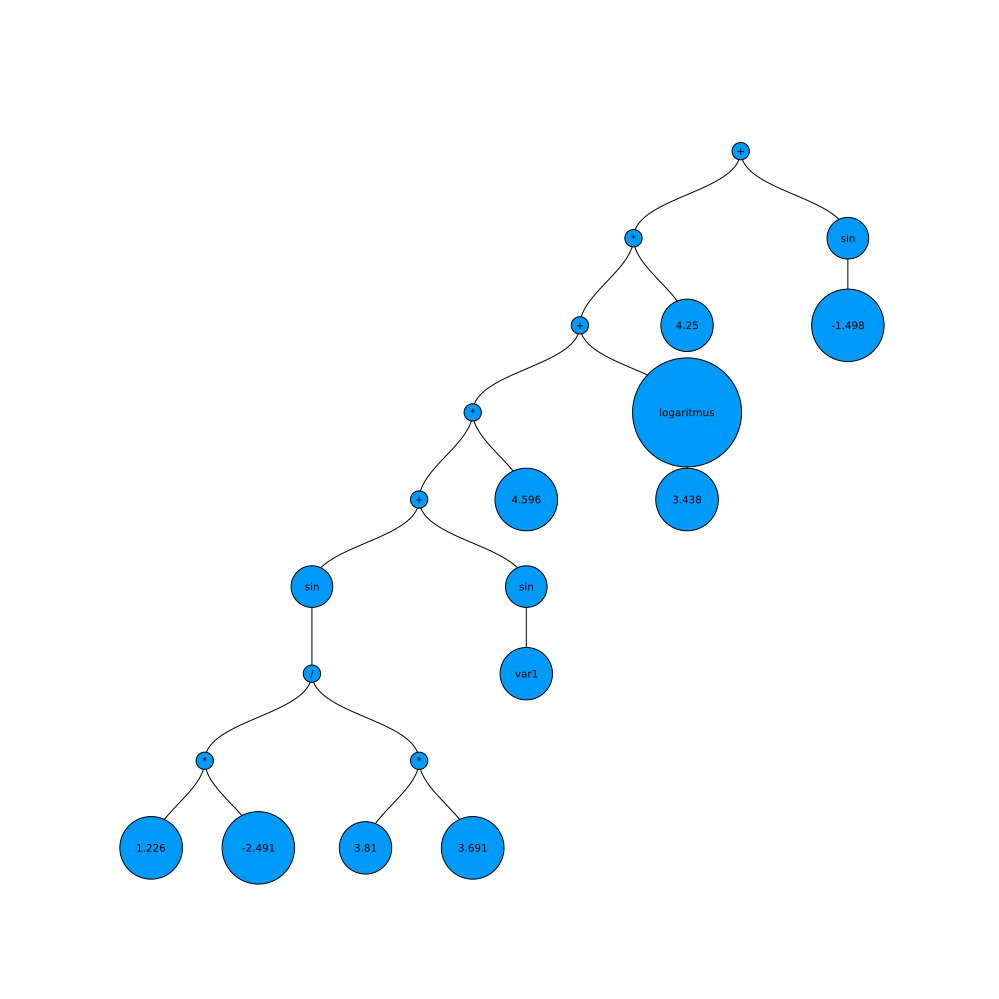

In [16]:
using GraphRecipes
using Plots
default(size=(1000, 1000))

p = plot(solution.top_coords, nodeshape=:circle, nodesize=0.1)

savefig(p, "../images/regression_tree.svg")
p

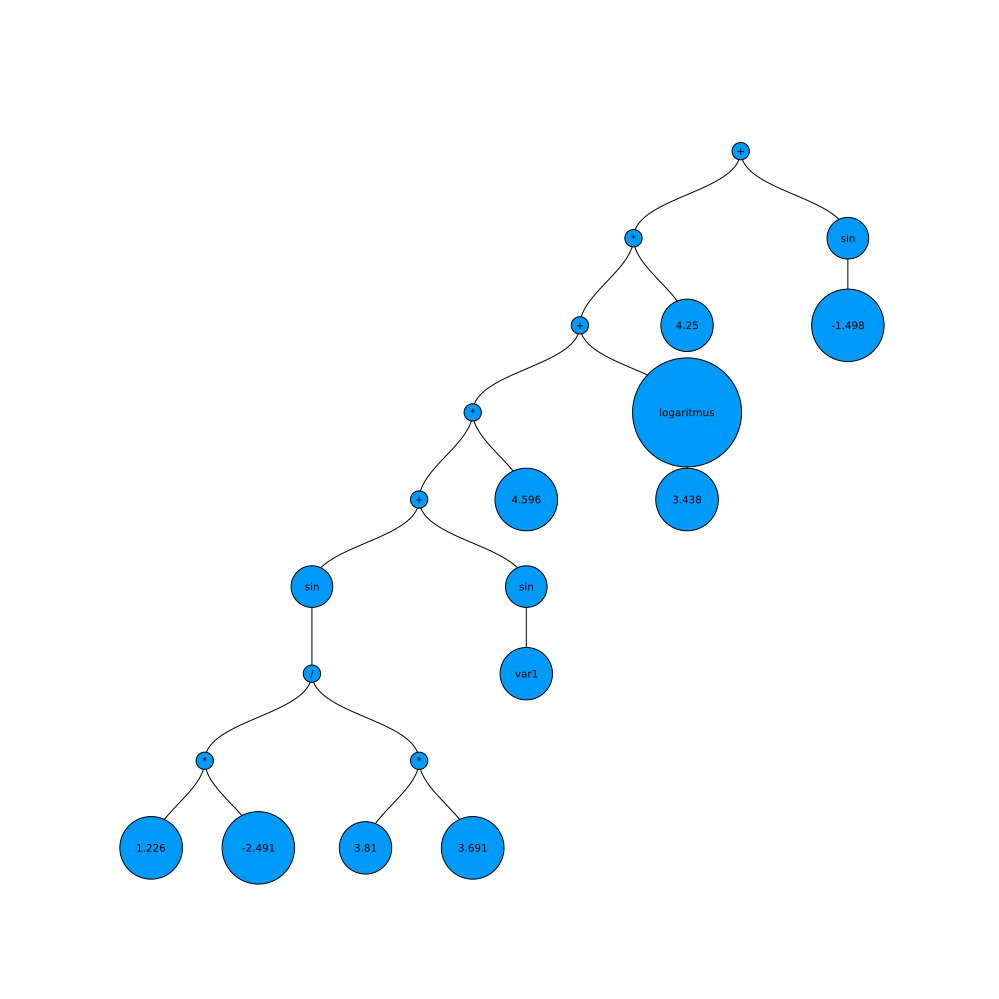

In [9]:

plot(EO.prune!(solution.top_coords), nodeshape=:circle, nodesize=0.1)

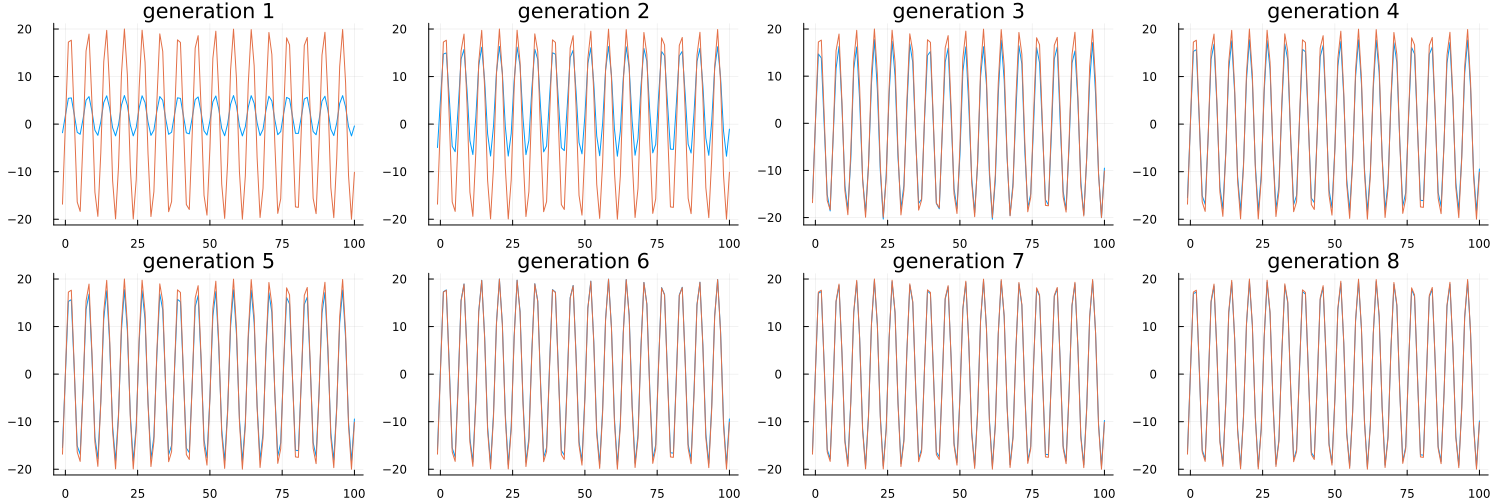

In [15]:

xx = collect(LinRange(-1., 100., 100))
yy = true_f.(xx);
p = plot(layout=(2,4), size=(1500, 500), legend=false)

for i in 1:8
    plot!(p, xx, EO.Expr_parser(solution.coords_history[i]).(xx), label="regressed_f", subplot=i, title="generation "*string(i))
    plot!(p, xx, yy, label="true_f", subplot=i)
end

savefig(p, "../images/regression_process.svg")
p

In [ ]:
using EO, Plots

basis_functions = [+, -, *, /, sin]
basis_variables = Vector{Any}([:x1, :opt1, :opt2, :opt3, :opt4])
constants = [zeros(100) for i in 1:4]

true_f = x -> 20*cos(x)

x = collect(LinRange(-1., 100., 100))
y = true_f.(x);

plot(x, y, label="true_f", size=(400, 400))

pop_size = 2

objective_function  = enclose_arguments(EO.f_function_diff_squared, y, x, constants...)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 2, 1)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(EO.r_best_n_diverse, pop_size, 0.7)       # chosen fraction of the population will consist of the best n, the rest is random
termination         = enclose_argument(iteration_termination, pop_size*1)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination, constants, [x], y)

model = EO.Expr_parser(solution.top_coords);
println(model.(x, constants...))
println(y)
println(solution.top_coords)

In [ ]:
using CSV, DataFrames

data = CSV.read("trading_data/archive(4)/sp500_stocks.csv", DataFrame)



In [ ]:
goog_close_values = data[data.Symbol .== "EA", :Close]

In [ ]:
price = filter("Symbol" => x->x == "EA", data).Open
time = filter("Symbol" => x->x == "EA", data).Date

In [7]:
using Plots
plot(price[1:1000])

BoundsError: BoundsError: attempt to access 61-element Vector{Float64} at index [1:1000]

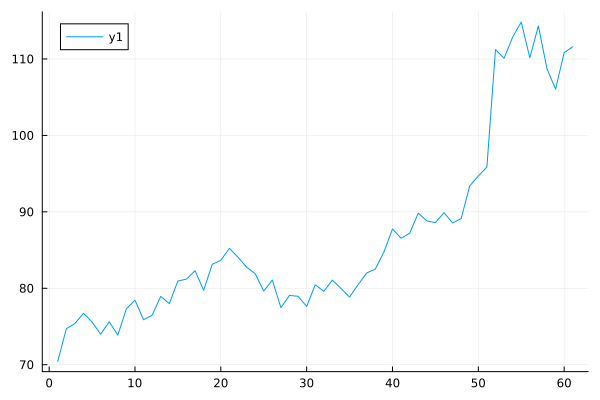

In [8]:
using CSV, DataFrames, EO, Plots, Statistics
x = collect(1000:2000)
x = collect(1600:5:1600+300)

data = CSV.read("trading_data/archive(4)/sp500_stocks.csv", DataFrame)
price = filter("Symbol" => x->x == "EA", data).Open
price = float.(price[x])

x = float.(x)

basis_functions = [+, -, *, /, sin, cos, EO.square, EO.cube, EO.logaritmus]
basis_variables = Vector{Any}([10., 50., 100., 1000., :var1])
plot(price)

In [9]:


pop_size = 300

objective_function  = enclose_arguments(EO.f_function_diff_subset, price, 0.9, x)
#objective_function  = enclose_arguments(EO.f_function_diff_squared, price, x)
initialization      = enclose_noargs(EO.expression_initialization, pop_size, objective_function, basis_functions, basis_variables)
selection           = enclose_arguments(EO.s_tournament, 300, 5)
#selection           = enclose_arguments(EO.s_greedy_overselection, pop_size, 0.16)
crossover           = enclose_arguments(EO.cr_subtree, pop_size, basis_functions, basis_variables)
#crossover           = enclose_arguments(EO.cr_GSGP, pop_size, basis_functions, basis_variables)
mutation            = enclose_arguments(EO.subtree_mutation!, basis_functions, basis_variables)
replacement         = enclose_replacement(EO.r_best_n_diverse, pop_size, 0.3)       # chosen fraction of the population will consist of the best n, the rest is random
termination         = enclose_argument(iteration_termination, pop_size*20)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)

model = EO.Expr_parser(solution.top_coords);
println(model.(x))
println(price)
println(solution.top_coords)

[5.527995477039081e55, 402338.05068136676, 7.5948849887183895e25, 413525.3606958674, 395480.1493971899, 1.7584906840618465e7, 383860.85977177205, 2.0023245426189243e24, 396557.0523526375, 405479.64807478664, 398926.40560914885, 384575.01373871113, 465724.7057245955, 427153.3128853409, 412590.55662668345, 465100.7506312774, 390889.39930496935, 3.532062567078578e49, 417811.997661938, 3.6071913334362536e42, 401470.8863358333, 1.7159558175068328e8, 414010.0745294031, 408122.9344893681, 427832.69944223, 403720.1531187376, 407633.17416159477, 439368.00474526786, 415756.1502370214, 411163.49990343547, 429992.1102260156, 396762.6634040149, 4.83693238329944e6, 1.989522970138913e7, 327747.1663382116, 1.4356371884731138e119, 9.525913233504778e15, 215394.9804466578, 420312.9587285016, 176683.77662606342, 421460.89934416575, 418782.66417586943, 237579.64269267238, 414777.99128687393, 413205.80334904464, 450246.858051621, 416150.0821242605, 452274.92831852497, 429021.8031094344, 394550.50332167896, 

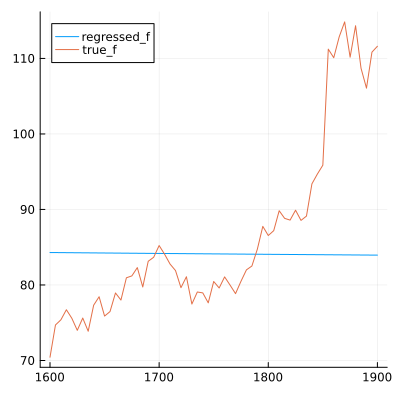

In [10]:
#p = plot(x, EO.Expr_parser(solution.pop_history[end].population[1].sequence).(x), label="regressed_f", size=(400, 400))
p = plot(x, EO.Expr_parser(solution.top_coords).(x), label="regressed_f", size=(400, 400))
p = plot!(p, x, price, label="true_f")

In [11]:
println(solution.pop_history[end].fitness)
println(std(solution.pop_history[end].fitness))

[8745.22600357756, 10302.415638139773, 5300.195683282729, 5680.534789553957, 8937.283778206027, 7032.7525678714455, 6932.36688093158, 6156.611985210721, 5548.864691752275, 8069.741270441832, 9977.85838515021, 10899.533723154313, 8810.587633181027, 6747.236459077365, 9576.897659339023, 7756.911318375169, 7214.22605186733, 7784.8500387253835, 9010.742547855443, 9680.855586376425, 2348.4148361768143, 9195.200435051123, 7450.136256265484, 6735.392340690787, 5245.512613457955, 10485.3838528173, 10488.976476748276, 3935.3956426786326, 9901.409208938136, 11900.1101813063, 8942.988748261405, 7763.585957096059, 3045.633760546165, 7862.563108124988, 8064.477104456444, 9163.39997813077, 10053.920220973123, 9229.797039462728, 10614.52659564784, 8489.302311616457, 4994.750385541029, 9343.945616889165, 9542.963545301907, 4500.180694879832, 7688.464049837588, 8029.262672323012, 9193.124282010567, 7206.74263566531, 5099.561276964527, 8628.535629708045, 8488.830563595931, 7312.771617475043, 8799.805638

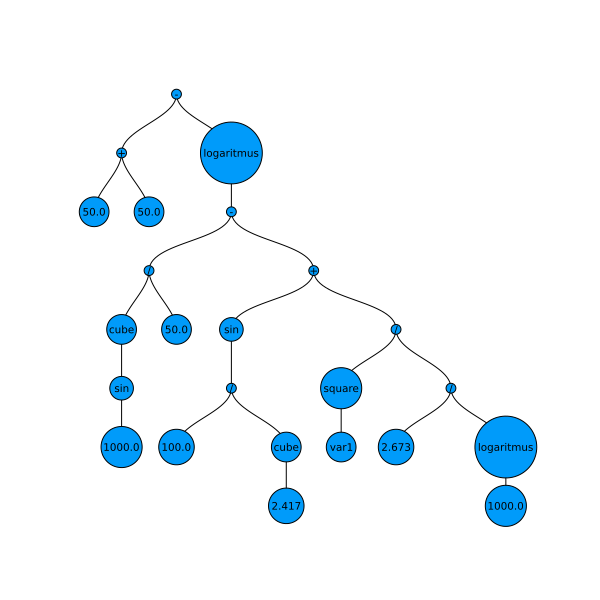

In [12]:
using GraphRecipes
using Plots

plot(solution.top_coords, nodeshape=:circle, nodesize=0.1, size=(600, 600))

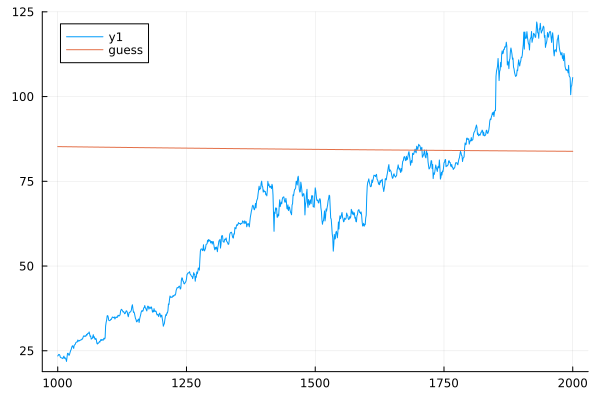

In [13]:
using CSV, DataFrames, EO, Plots, Statistics
x = collect(1000:2000)

data = CSV.read("trading_data/archive(4)/sp500_stocks.csv", DataFrame)
price = filter("Symbol" => x->x == "EA", data).Open
price = float.(price[x])
x = float.(x)
p = plot(x, price)
p = plot!(p, x, EO.Expr_parser(solution.top_coords).(x), label="guess")